A. Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv("./ObesityDataSet_raw_and_data_sinthetic.csv")
if 'Age' in df.columns:
    df['Age'] = df['Age'].round().astype(int)
df


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,21,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,22,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,23,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [2]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


B. EDA

In [3]:
print("Dataset shape:", df.shape)
print("Columns:", df.columns.tolist())
df.info()
df.describe()

Dataset shape: (2111, 17)
Columns: ['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   int64  
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE    

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.315964,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.357078,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,23.000000,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


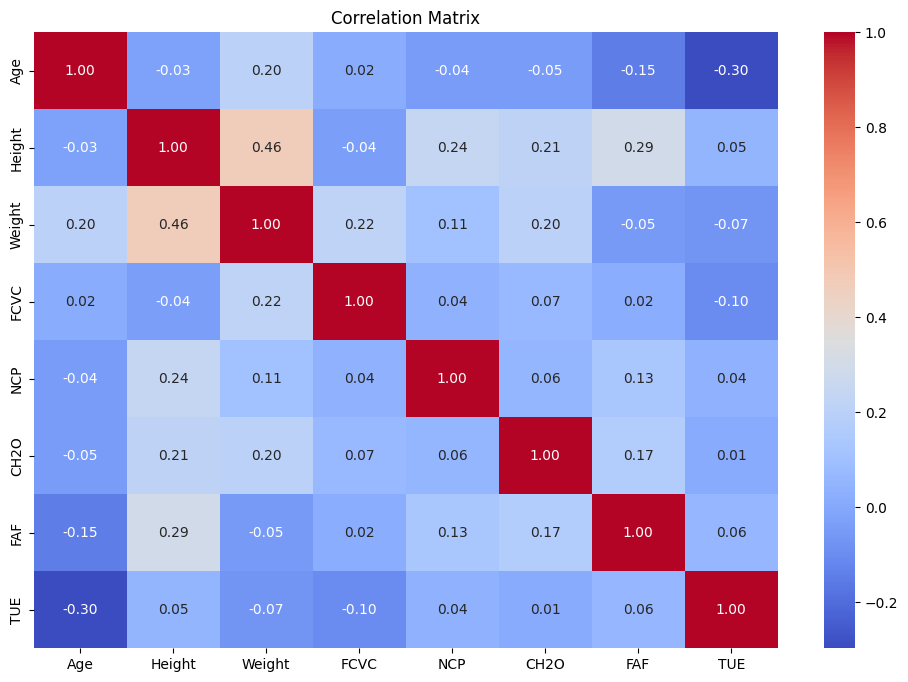

Detected target column: NObeyesdad


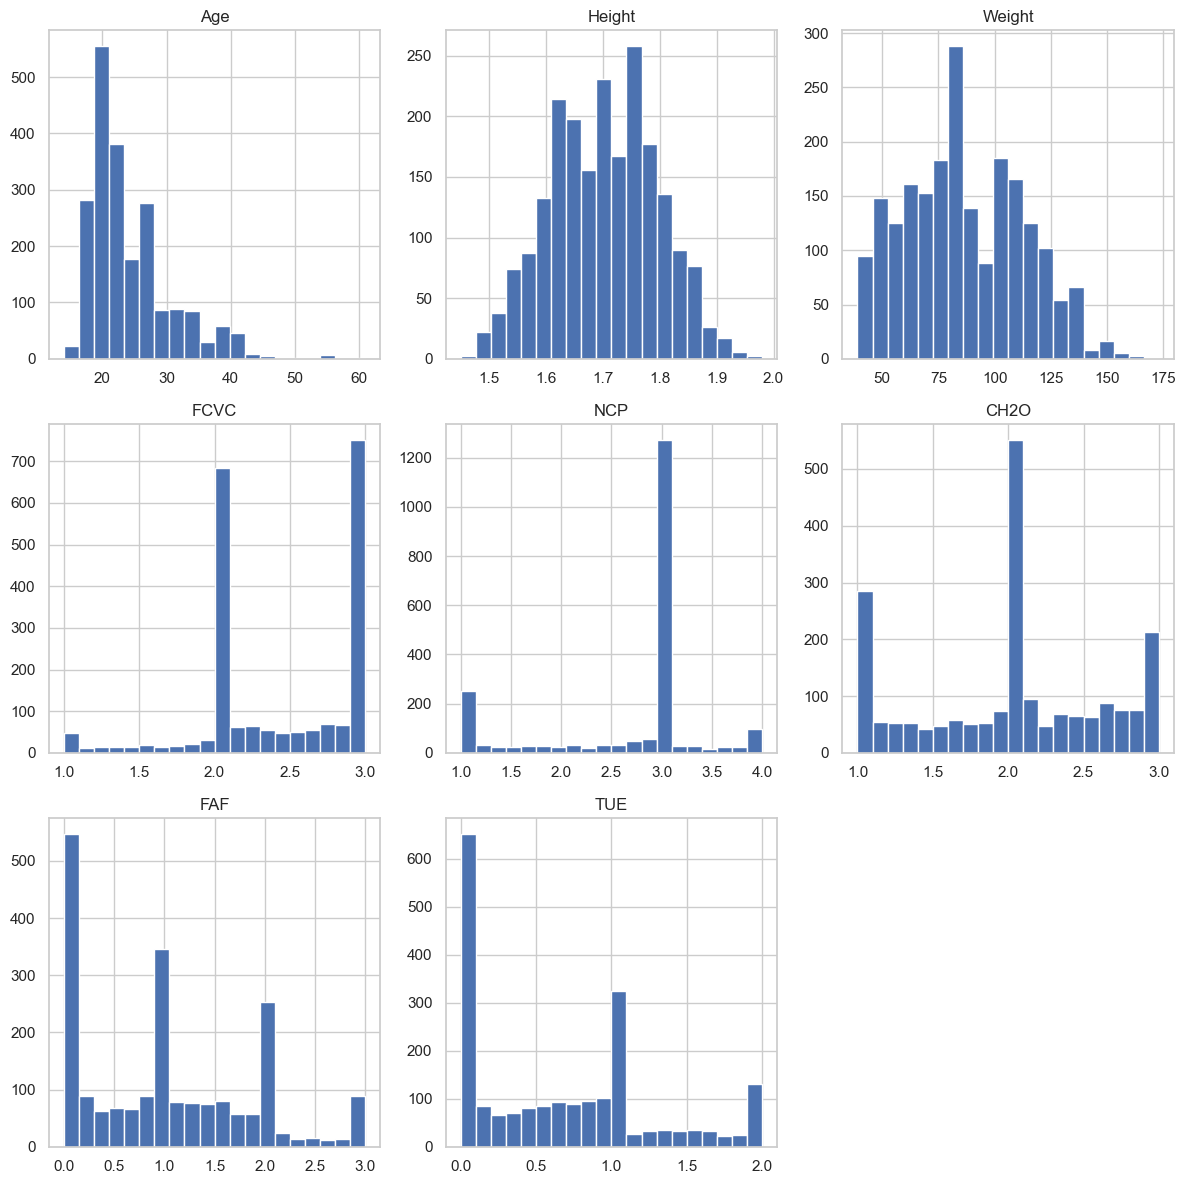

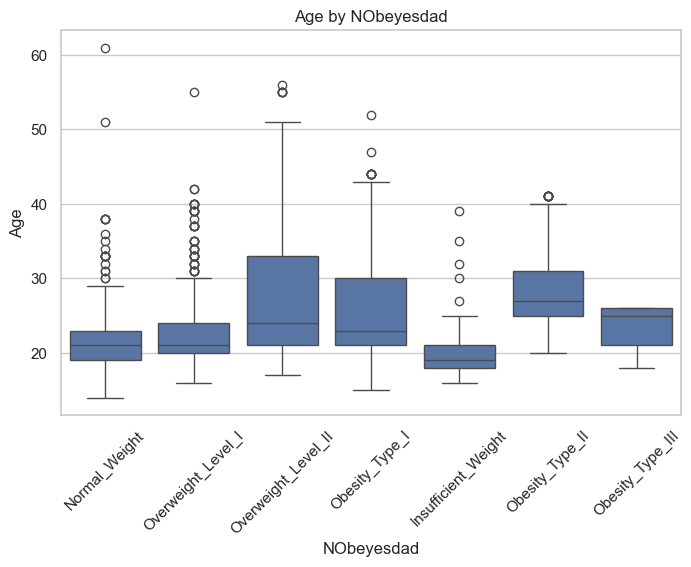

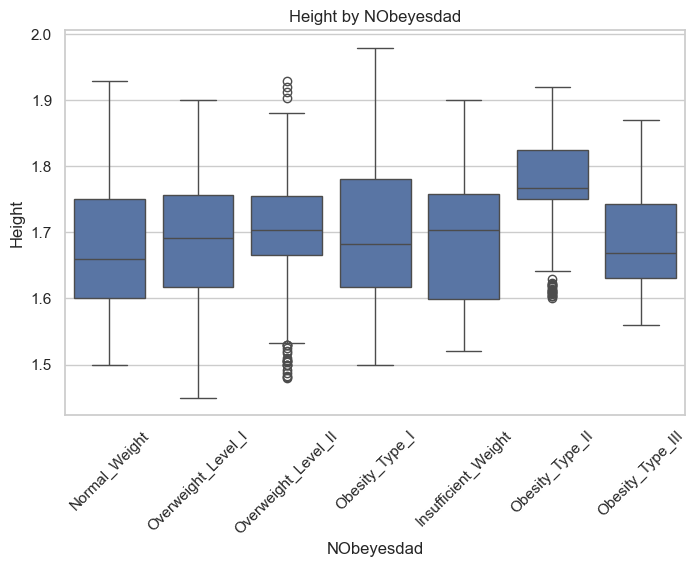

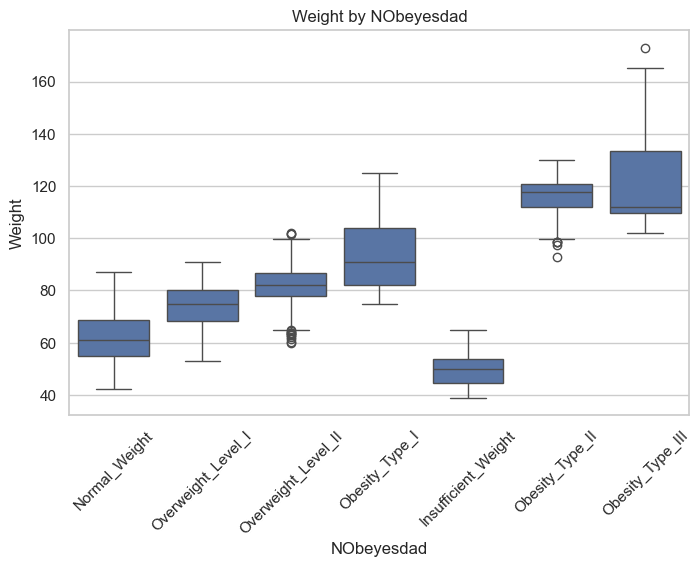

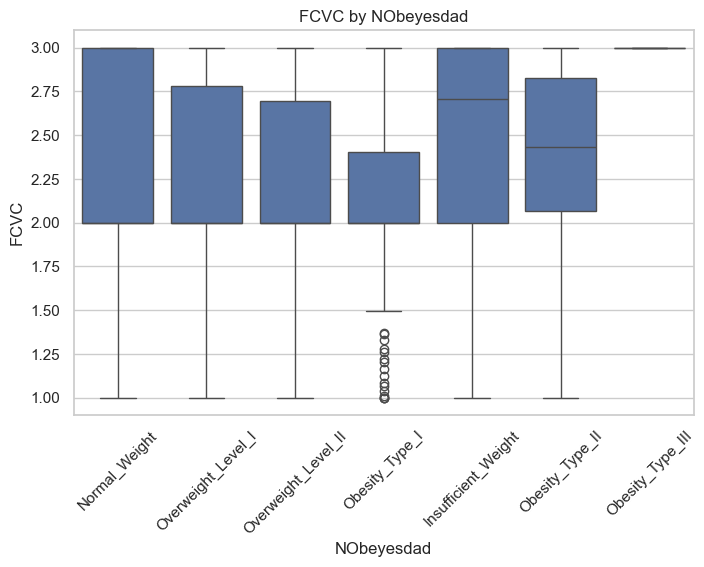

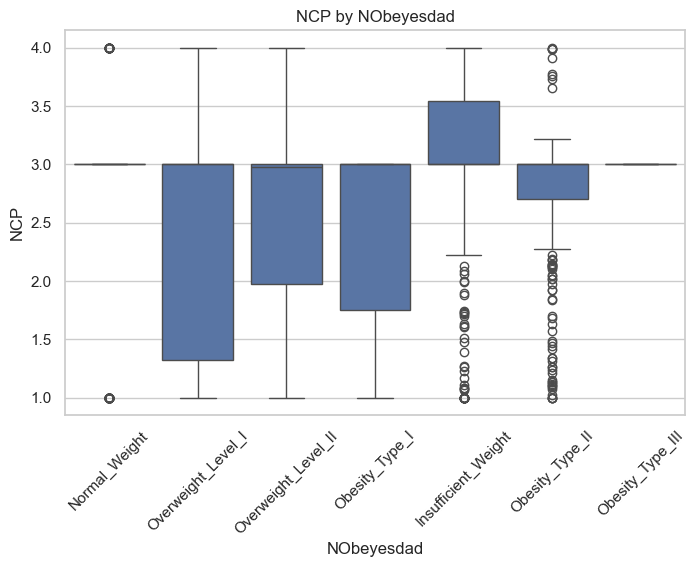

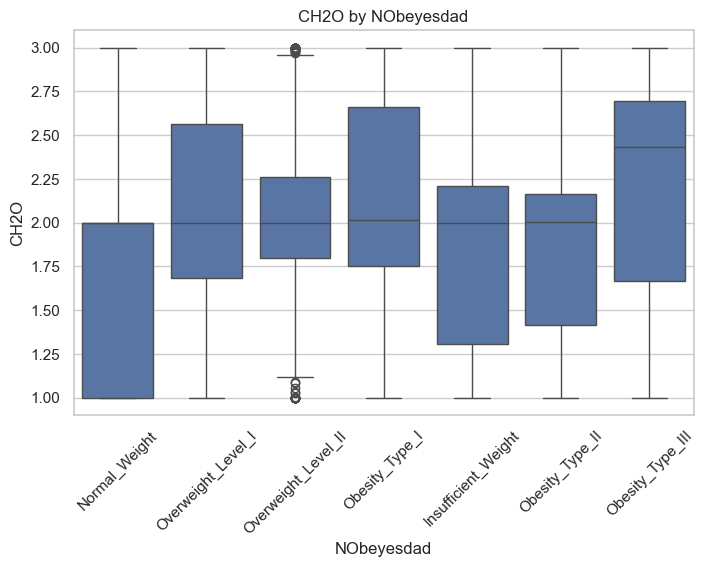

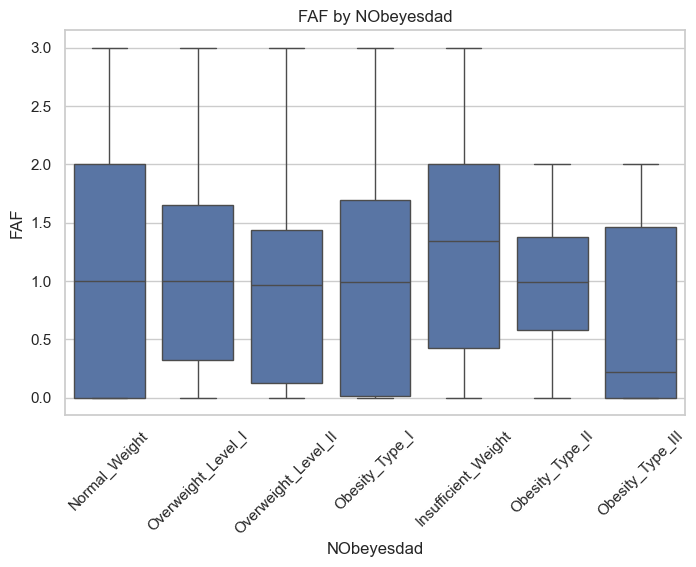

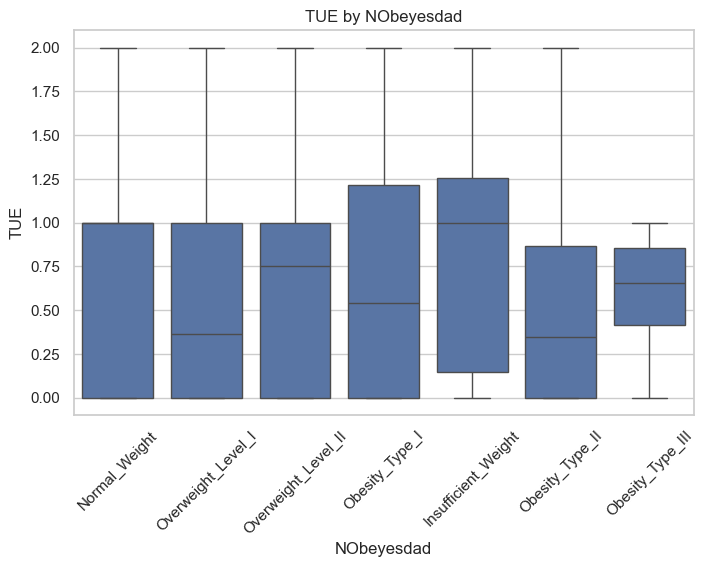

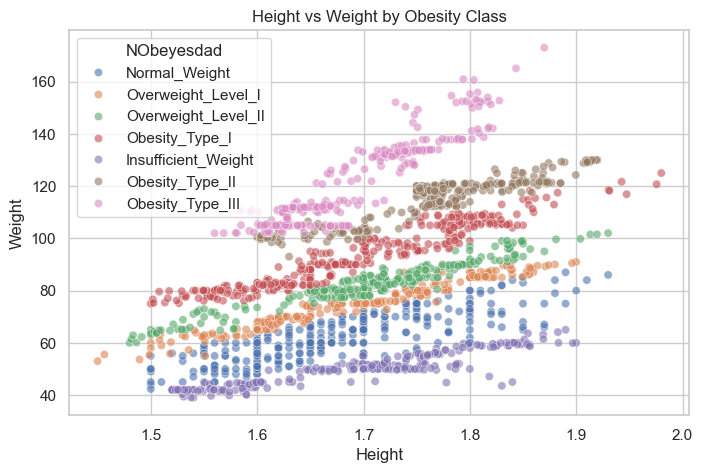

In [4]:
# Correlation matrix
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
corr = df[numeric_cols].corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()
sns.set(style="whitegrid")

cat_cols = df.select_dtypes(include='object').columns
target_col = None
max_unique = 0
for col in cat_cols:
    n_unique = df[col].nunique()
    if n_unique > 1 and n_unique > max_unique:
        target_col = col
        max_unique = n_unique

print("Detected target column:", target_col)

# Histograms
n_cols = 3
n_rows = math.ceil(len(numeric_cols)/n_cols)
df[numeric_cols].hist(bins=20, layout=(n_rows,n_cols), figsize=(12,4*n_rows))
plt.tight_layout()
plt.show()

# Boxplots for each numeric column by target
for col in numeric_cols:
    plt.figure(figsize=(8,5))
    sns.boxplot(x=target_col, y=col, data=df)
    plt.title(f"{col} by {target_col}")
    plt.xticks(rotation=45)
    plt.show()

# Scatter plot: Height vs Weight
if {'Height','Weight'}.issubset(numeric_cols):
    plt.figure(figsize=(8,5))
    sns.scatterplot(x='Height', y='Weight', hue=target_col, data=df, alpha=0.6)
    plt.title("Height vs Weight by Obesity Class")
    plt.show()

C. Data Preparation

In [5]:
# Check and remove duplicates
print("Duplicate rows:", df.duplicated().sum())
df = df.drop_duplicates()

Duplicate rows: 24


In [6]:
# Check missing values
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

# Percentage of missing values
missing_percent = (df.isnull().sum() / len(df)) * 100
print("\nPercentage of missing values per column:\n", missing_percent)

# Fill numeric missing values with 0
num_cols = df.select_dtypes(include='number').columns
df.loc[:, num_cols] = df[num_cols].fillna(0)

# Fill categorical missing values with "Unknown"
cat_cols = df.select_dtypes(include='object').columns
df.loc[:, cat_cols] = df[cat_cols].fillna("Unknown")

# Verify missing values are filled
print("\nMissing values after filling:\n", df.isnull().sum())

Missing values per column:
 Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

Percentage of missing values per column:
 Gender                            0.0
Age                               0.0
Height                            0.0
Weight                            0.0
family_history_with_overweight    0.0
FAVC                              0.0
FCVC                              0.0
NCP                               0.0


In [7]:
# Detect outliers using IQR
def detect_outliers_iqr(df, columns):
    outlier_indices = {}

    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outlier_indices[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index.tolist()

    return outlier_indices

# Example for your numeric columns
numeric_cols = ['Age', 'Height', 'Weight', 'NCP', 'CH2O', 'FAF', 'TUE']

outliers = detect_outliers_iqr(df, numeric_cols)

# Detecting and removing outliers
outliers = detect_outliers_iqr(df, numeric_cols)
all_outlier_indices = set()
for col_outliers in outliers.values():
    all_outlier_indices.update(col_outliers)
df = df.drop(index=all_outlier_indices)

print(f"Original dataframe shape: {df.shape}")
print(f"Dataframe shape after removing outliers: {df.shape}")
df

Original dataframe shape: (1393, 17)
Dataframe shape after removing outliers: (1393, 17)


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
5,Male,29,1.620000,53.000000,no,yes,2.0,3.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Automobile,Normal_Weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,21,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,22,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,23,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [8]:
# Ensure no negative values in numeric columns
for col in num_cols:
    df[col] = df[col].apply(lambda x: max(x, 0))

# Convert Height from cm to meters if needed
if df['Height'].max() > 3:  # assume in cm
    df['Height_m'] = df['Height'] / 100
else:
    df['Height_m'] = df['Height']

df['BMI'] = df['Weight'] / (df['Height_m'] ** 2)
num_cols = num_cols.tolist() + ['BMI']


In [9]:
#Split dataset into train, validation, test sets
from sklearn.model_selection import train_test_split

# Set your target
target_column = 'NObeyesdad'
df = df.dropna(subset=[target_column])
X = df.drop(target_column, axis=1)
y = df[target_column]

# Check target value counts
print("Target value counts:\n", y.value_counts())

# First split: train+val (80%) and test (20%)
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Second split: train (60%) and val (20%) from train_val
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val
)

# Check shapes
print("Train:", X_train.shape, y_train.shape)
print("Validation:", X_val.shape, y_val.shape)
print("Test:", X_test.shape, y_test.shape)

Target value counts:
 NObeyesdad
Obesity_Type_III       323
Obesity_Type_II        216
Normal_Weight          196
Obesity_Type_I         194
Overweight_Level_II    173
Overweight_Level_I     150
Insufficient_Weight    141
Name: count, dtype: int64
Train: (835, 18) (835,)
Validation: (279, 18) (279,)
Test: (279, 18) (279,)


D. Model Training

In [10]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Identify categorical and numeric columns
categorical_cols = X_train.select_dtypes(include='object').columns.tolist()
numeric_cols = X_train.select_dtypes(include='number').columns.tolist()

# Preprocessing step
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numeric_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)
    ]
)

# Apply preprocessing
X_train_fixed = preprocessor.fit_transform(X_train)
X_test_fixed = preprocessor.transform(X_test)


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_fixed, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [12]:
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train_fixed, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [13]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_fixed, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [14]:
y_pred_log = log_model.predict(X_test_fixed)
print("\nLOGISTIC REGRESSION RESULTS")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

y_pred_rf = rf_model.predict(X_test_fixed)
print("\nRANDOM FOREST RESULTS")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

y_pred_knn = knn_model.predict(X_test_fixed)
print("\nKNN RESULTS")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

print("\nMODEL COMPARISON")
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))



LOGISTIC REGRESSION RESULTS
Accuracy: 0.8924731182795699
                     precision    recall  f1-score   support

Insufficient_Weight       0.85      1.00      0.92        28
      Normal_Weight       0.88      0.72      0.79        39
     Obesity_Type_I       0.85      0.90      0.88        39
    Obesity_Type_II       0.91      1.00      0.96        43
   Obesity_Type_III       1.00      1.00      1.00        65
 Overweight_Level_I       0.77      0.80      0.79        30
Overweight_Level_II       0.87      0.74      0.80        35

           accuracy                           0.89       279
          macro avg       0.88      0.88      0.87       279
       weighted avg       0.89      0.89      0.89       279


RANDOM FOREST RESULTS
Accuracy: 0.992831541218638
                     precision    recall  f1-score   support

Insufficient_Weight       1.00      1.00      1.00        28
      Normal_Weight       0.95      1.00      0.97        39
     Obesity_Type_I       1.00   

In [15]:
from sklearn.model_selection import GridSearchCV

lr_params = {
    "C": [0.01, 0.1, 1, 10],
    "solver": ["lbfgs", "saga"],
    "max_iter": [500, 1000]
}

lr_grid = GridSearchCV(
    LogisticRegression(),
    lr_params,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)

lr_grid.fit(X_train_fixed, y_train)

print("Best Logistic Regression Params:", lr_grid.best_params_)
log_model = lr_grid.best_estimator_


Best Logistic Regression Params: {'C': 0.1, 'max_iter': 1000, 'solver': 'lbfgs'}


In [16]:
rf_params = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10]
}

rf_grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    rf_params,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)

rf_grid.fit(X_train_fixed, y_train)

print("Best Random Forest Params:", rf_grid.best_params_)
rf_model = rf_grid.best_estimator_

Best Random Forest Params: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}


In [17]:
knn_params = {
    "n_neighbors": [3, 5, 7, 9, 11],
    "weights": ["uniform", "distance"],
    "p": [1, 2]
}

knn_grid = GridSearchCV(
    KNeighborsClassifier(),
    knn_params,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)

knn_grid.fit(X_train_fixed, y_train)

print("Best KNN Params:", knn_grid.best_params_)
knn_model = knn_grid.best_estimator_


Best KNN Params: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}


In [18]:
# Predictions
y_pred_log = log_model.predict(X_test_fixed)
y_pred_rf = rf_model.predict(X_test_fixed)
y_pred_knn = knn_model.predict(X_test_fixed)

# Print results
print("\nLOGISTIC REGRESSION")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("\nRANDOM FOREST")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nKNN")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
df



LOGISTIC REGRESSION
Accuracy: 0.953405017921147

RANDOM FOREST
Accuracy: 0.992831541218638

KNN
Accuracy: 0.9713261648745519


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,Height_m,BMI
0,Female,21,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight,1.620000,24.386526
1,Female,21,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight,1.520000,24.238227
2,Male,23,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight,1.800000,23.765432
3,Male,27,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I,1.800000,26.851852
5,Male,29,1.620000,53.000000,no,yes,2.0,3.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Automobile,Normal_Weight,1.620000,20.195092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,21,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III,1.710730,44.901475
2107,Female,22,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III,1.748584,43.741923
2108,Female,23,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III,1.752206,43.543817
2109,Female,24,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III,1.739450,44.071535


E. Model Evaluation

--- Random Forest ---
Accuracy: 0.992831541218638
Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       1.00      1.00      1.00        28
      Normal_Weight       0.95      1.00      0.97        39
     Obesity_Type_I       1.00      1.00      1.00        39
    Obesity_Type_II       1.00      1.00      1.00        43
   Obesity_Type_III       1.00      1.00      1.00        65
 Overweight_Level_I       1.00      0.93      0.97        30
Overweight_Level_II       1.00      1.00      1.00        35

           accuracy                           0.99       279
          macro avg       0.99      0.99      0.99       279
       weighted avg       0.99      0.99      0.99       279



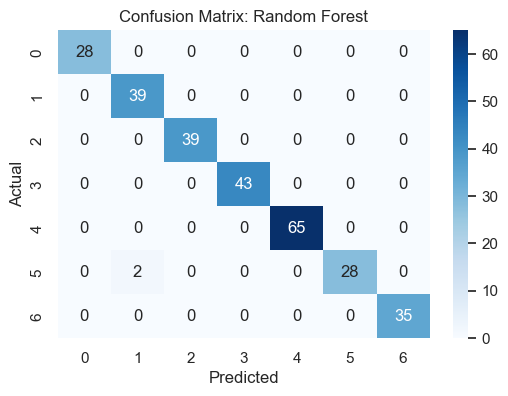

--- Logistic Regression ---
Accuracy: 0.953405017921147
Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.90      1.00      0.95        28
      Normal_Weight       0.92      0.87      0.89        39
     Obesity_Type_I       0.95      1.00      0.97        39
    Obesity_Type_II       1.00      1.00      1.00        43
   Obesity_Type_III       1.00      1.00      1.00        65
 Overweight_Level_I       0.87      0.87      0.87        30
Overweight_Level_II       0.97      0.89      0.93        35

           accuracy                           0.95       279
          macro avg       0.94      0.95      0.94       279
       weighted avg       0.95      0.95      0.95       279



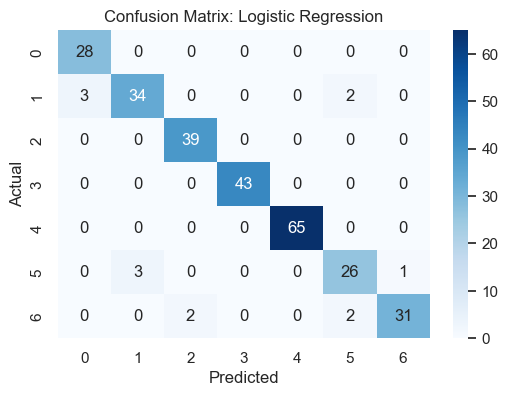

--- K-Nearest Neighbors ---
Accuracy: 0.9713261648745519
Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.90      1.00      0.95        28
      Normal_Weight       1.00      0.82      0.90        39
     Obesity_Type_I       1.00      1.00      1.00        39
    Obesity_Type_II       1.00      1.00      1.00        43
   Obesity_Type_III       1.00      1.00      1.00        65
 Overweight_Level_I       0.86      1.00      0.92        30
Overweight_Level_II       1.00      0.97      0.99        35

           accuracy                           0.97       279
          macro avg       0.97      0.97      0.97       279
       weighted avg       0.97      0.97      0.97       279



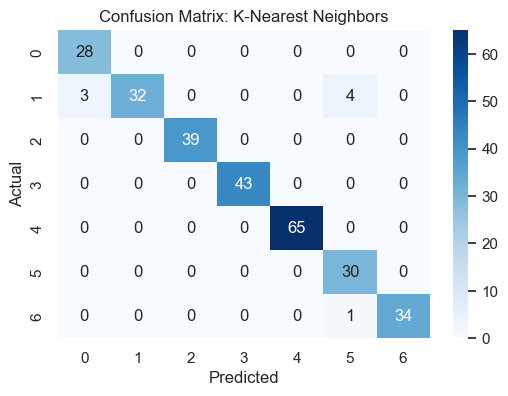

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_model(y_true, y_pred, model_name):
    print(f"--- {model_name} ---")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))
    
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Evaluate Random Forest
evaluate_model(y_test, y_pred_rf, "Random Forest")

# Evaluate Logistic Regression
evaluate_model(y_test, y_pred_log, "Logistic Regression")

# Evaluate KNN
evaluate_model(y_test, y_pred_knn, "K-Nearest Neighbors")
